<a href="https://colab.research.google.com/github/BoKna031/GoogleColabFunProjects/blob/master/Yugioh_card_print_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
CARD_FOLDER_NAME = "cards"
TEMPLATE_FORMAT = ".png"
TEMPLATE_FILE_NAME = "card-template" + TEMPLATE_FORMAT

In [ ]:
import os
import shutil

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Možete dodati i druge podržane formate slika
            img = cv2.imread(os.path.join(folder, filename))
            if img is not None:
                images.append(img)
    return images

def save_images_to_folder(images, folder):
  if os.path.exists(folder):
    shutil.rmtree(folder)
  os.makedirs(folder)

  for i, img in enumerate(images):
    cv2.imwrite(os.path.join(folder, f"image_{i}" + TEMPLATE_FORMAT), img)

In [ ]:
def show_img(img, gray = False):
  if gray:
    plt.imshow(img, 'gray')
  else:
    plt.imshow(img)
  plt.axis('off')
  plt.show()

In [ ]:
def create_template_pages(total_num_of_cards, cards_per_page, base_img):
  pages = (total_num_of_cards // cards_per_page) + 1
  templates = []
  for p in range(pages):
    templates.append(base_img.copy())
  return templates

# Yu-Gi-Oh printable pages generator

In [ ]:
template_img = cv2.imread('./' + TEMPLATE_FILE_NAME)

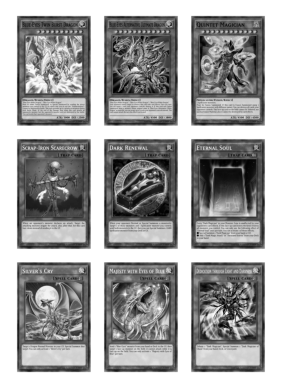

In [ ]:
gray_template = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
#show_img(gray_template, True)

In [ ]:
ret,mask = cv2.threshold(gray_template,200,255,cv2.THRESH_BINARY) #exlude white background
mask = 255 - mask

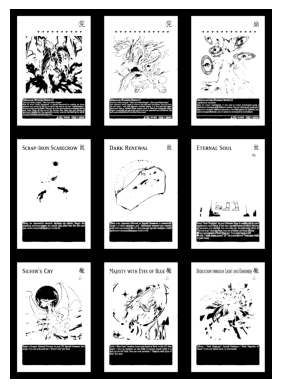

In [ ]:
show_img(mask, True)

In [ ]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [ ]:
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED);

In [ ]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

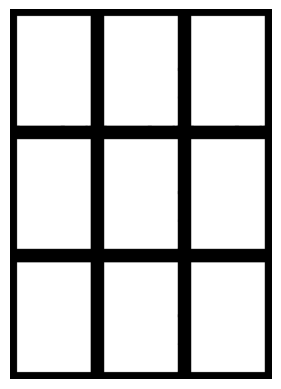

In [ ]:
show_img(mask, 'gray')

In [ ]:
image_with_contours = cv2.cvtColor(template_img.copy(), cv2.COLOR_BGR2RGB)
found_rect_set = set()
for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)  # Pronađi koordinate i dimenzije pravougaonika oko konture
    top_left = (x, y)
    bottom_right = (x + w, y + h)
    found_rect_set.add((top_left, bottom_right))
found_rect = list(found_rect_set)

In [ ]:
def get_coordinates(rect):
  p1, p2 = rect
  x1, y1 = p1
  x2, y2 = p2
  return x1, y1, x2, y2

In [ ]:
x1, y1, x2, y2 = get_coordinates(found_rect[0])
card_dimension = (x2-x1, y2-y1)

In [ ]:
loaded_cards = load_images_from_folder('./' + CARD_FOLDER_NAME)

In [ ]:
template_pages = create_template_pages(len(loaded_cards), len(found_rect), template_img)

In [ ]:
for i, card in enumerate(loaded_cards):
  inx = i % len(found_rect)
  page = i // len(found_rect)
  template_page = template_pages[page]
  resized_card = cv2.resize(card, card_dimension)
  x1, y1, x2, y2 = get_coordinates(found_rect[inx])
  template_page[y1:y2, x1:x2] = resized_card

In [ ]:
save_images_to_folder(template_pages, './printable-pages')